# Building A Handwritten Digits Classifier

According to [Wikipedia](https://en.wikipedia.org/wiki/MNIST_database): "The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets.....Furthermore, the black and white images from NIST were normalized to fit into a 28 x 28 pixel bounding box and anti-aliased, which introduced grayscale levels. The MNIST database contains 60,000 training images and 10,000 testing images."

This project incorporates a fraction of the original MNIST images at a reduced 8x8 resolution in order to explore the effectiveness of deep, feed-forward neural networks with multiple hidden layers and neurons to classify images. It also compares neural networks models to the k-nearest neighbors algorithm to see which performs the best. The following models were explored: 
- K-Nearest Neighbors with Various K-Values
- Neural Network with One Hidden Layer and Multiple Neurons
- Neural Network with Two Hidden Layers and Multiple Neurons
- Neural Network with Three Hidden Layers and Multiple Neurons



### Project Purpose
This project is for the completion of the DataQuest.io https://www.dataquest.io/ "Deep Learning Fundamentals Course"; one of the requirement for completing the Data Science course path.

### Summary Results
The K-Nearest Neighbor Algorithm and the Neural Networks models with one, two and three hidden layers are all capable of attaining accurate predictions well above 95% with the right input variables. For K-Nearest Neighbors the k-value of 3 produced the best result. For Neural Networks, the ideal number of neurons was ~ 150 for one, two and three hidden layers.

# Data Source and Exploration
The this data set can be found on UCI's Machine Learning Repository: [Optical Recognition of Handwritten Digits Data Set](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). It's also one of a number of datasets that's offered within Scikit Learn: [sklearn.datasets.load](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) that can be easily imported with the library itself, which is where the data exploration begins: 

In [70]:
#Import the appropriate python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import warnings 
warnings.filterwarnings('ignore')

# Import the data
data = load_digits()
data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [71]:
# Exploring the 'data' array by converting it to a pd dataframe and renaming it to "features."
features = pd.DataFrame(data['data'])
features.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [72]:
# Exploring the number of rows and columns in 'features'
features.shape

(1797, 64)

In [73]:
# Exploring the 'target' array by converting it into a pd series named 'target'
target = pd.Series(data['target'])
target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

# Visualizing Data from Pixels
Each row in the features data frame is a series of pixels that create a gray scale image from 0 to 16. In order to view the image it has to be reshaped back into it's original 8x8 pixel. The first image below is the result of the first row of data. The other images below correspond to the following rows: 0, 100, 200, 300, 1000, 1100, 1200, and 1300

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

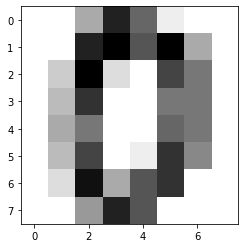

In [74]:
first_image = features.iloc[0] # Select first row
np_image = first_image.values # Convert values into an array
np_image = np_image.reshape(8,8) # Convert array into an 8x8 format
plt.imshow(np_image, cmap='gray_r') # Use matplotlib .imshow to display data as an image
np_image

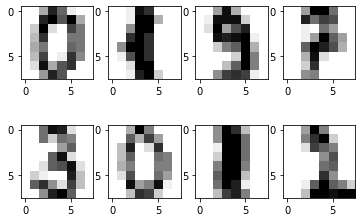

In [75]:
# Repeat for additional rows
fig,ax = plt.subplots(2,4)
ax[0,0].imshow(features.iloc[0].values.reshape(8,8), cmap='gray_r')
ax[0,1].imshow(features.iloc[99].values.reshape(8,8), cmap='gray_r')
ax[0,2].imshow(features.iloc[199].values.reshape(8,8), cmap='gray_r')
ax[0,3].imshow(features.iloc[299].values.reshape(8,8), cmap='gray_r')

ax[1,0].imshow(features.iloc[999].values.reshape(8,8), cmap='gray_r')
ax[1,1].imshow(features.iloc[1099].values.reshape(8,8), cmap='gray_r')
ax[1,2].imshow(features.iloc[1199].values.reshape(8,8), cmap='gray_r')
ax[1,3].imshow(features.iloc[1299].values.reshape(8,8), cmap='gray_r')

# K-Nearest Neighbors with Various K-Values
The K-Nearest Neighbors Algorithm makes no assumption about linearity, and compares every unseen observation in the test set to all the others under given constraints. The following uses the KNeighborsClassifier package from Scikit Learn to understand how  k-values from 1 to 30 impact performance.   

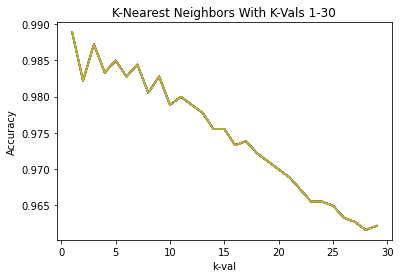

In [76]:
def cross_validate(kval):
    """ 
    Performs 4 fold cross validation: cycles through 
    all four divisions of the data set so that each set 
    used for training the algorithm three times and testing once.
    The accuracy for each fold is stored and returned in a list.
    """
    accuracy = []
    # instantiates KFold model
    kf = KFold(n_splits = 4, shuffle = True, random_state= 2)     
    for train_index, test_index in kf.split(features):
        
        train_features = features.iloc[train_index]
        test_features = features.iloc[test_index]
        train_labels = target.iloc[train_index]
        test_labels = target.iloc[test_index]
        
     # instantiates the KNeighborsClassifier with kval as the constraint 
        knn = KNeighborsClassifier(n_neighbors = kval)
     # fit the model
        knn.fit(train_features,train_labels)
        
    #predict
        knn_predictions = knn.predict(test_features)
        
    # get accuracy of all four folds and append to list
        accuracy_val = (accuracy_score(test_labels,knn_predictions))
        accuracy.append(accuracy_val)
        
    # returns the mean of all four folds and the predictions
    return np.mean(accuracy)


"""
The code below cycles through kvals from 1 to 30 and calls the cross_validate
function with each cycle. The accuracy value from the function is returned 
and stored in an accuracy dictionary with it's respective k-value key. 
The results are plotted in the k-val vs. accuracy line graph. 
"""
accuracy_dict = {}
kvals = [i for i in range (1, 30)]  

for kval in kvals:
    accuracy_dict[kval] = cross_validate(kval)
for keys,values in accuracy_dict.items():
    x = list(accuracy_dict.keys())
    y = list(accuracy_dict.values())
    
    plt.plot(x,y)
    plt.title('K-Nearest Neighbors With K-Vals 1-30')
    plt.xlabel('k-val')
    plt.ylabel('Accuracy')

### Results of K-Nearest Neighbors
Accuracy peaks at k-value = 3 and steadily treads downward. 

# Neural Network with One Hidden Layer and Multiple Neurons
The downside of k-nearest neighbors is it's high memory usage, and lack of model representation to debug or explore. The next model is a neural network classifier from Scikit Learn that incorporates a single hidden layer with 8, 16, 32, 64, 128, and 256 neurons. 

In [77]:
def nn_hidden(n):
    """ 
    Performs 4 fold cross validation: cycles through 
    all four divisions of the data set so that each set 
    used for training the algorithm three times and testing once.
    The accuracy for each fold is stored and returned in a list.
    """
    accuracy = [] 
    # instantiates KFold model
    kf = KFold(n_splits = 4, shuffle = True, random_state= 2)      
    for train_index, test_index in kf.split(features):
        
        train_features = features.iloc[train_index]
        test_features = features.iloc[test_index]
        train_labels = target.iloc[train_index]
        test_labels = target.iloc[test_index]
        
        
    # instantiates the MLPClassifier with the appropriate constraits
        mlp = MLPClassifier(hidden_layer_sizes=(n), activation = 'relu')
    #fit the model
        mlp.fit(train_features,train_labels)
        
    #predict
        nn_predictions = mlp.predict(test_features)
        
    # get accuracy of all four folds and append to list
        accuracy_val = (accuracy_score(test_labels,nn_predictions))
        accuracy.append(accuracy_val)
    
    # returns the mean of all four folds and the predictions
    return np.mean(accuracy)


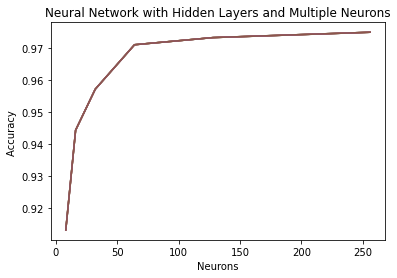

In [78]:
def plot_accuracy(neurons):
    
    # Plots neuron vs. accuracy line graph. 
    accuracy_dict = {}
 
    for n in neurons:
        accuracy_dict[n] = nn_hidden(n)
    for keys,values in accuracy_dict.items():
        x = list(accuracy_dict.keys())
        y = list(accuracy_dict.values())
        plt.plot(x,y)
        plt.title('Neural Network with Hidden Layers and Multiple Neurons')
        plt.xlabel('Neurons')
        plt.ylabel('Accuracy ')
        
#explores 8,16,32,64, 128, and 256 neurons with one layer       
one_hidden = [8, 16, 32, 64, 128, 256]     
plot_accuracy(one_hidden)

### Results of Neural Network with One Hidden Layer
Accuracy increases significantly with the addition of neurons until about 64. Then it flattens out and only increases marginally. 

# Neural Network with Two Hidden Layers and Multiple Neurons 
The next model explores accuracy results from two hidden layers with multiple neurons

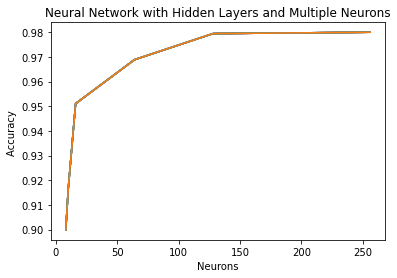

In [79]:
#explores 8,16,32,64, 128, and 256 neurons with two layers      
two_hidden = ((8,8), (10,10), (16,16), (64,64), (128,128), (256,256))    
plot_accuracy(two_hidden)

### Results of Neural Network with Two Hidden Layers
The accuracy is similar to one hidden layer in that the accuracy increases dramatically then flattens out. 

# Neural Network with Three Hidden Layers and Multiple Neurons
The next model explores accuracy results from three hidden layers with multiple neurons

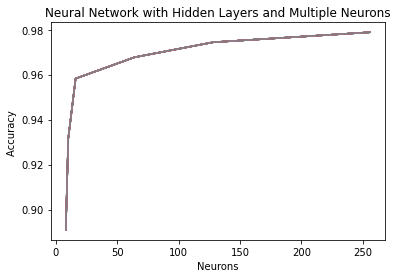

In [80]:
#explores 8,16,32,64, 128, and 256 neurons with three layers      
three_hidden = ((8,8,8), (10,10,10), (16,16,16), (64,64,64), (128,128,128), (256,256,256))   
plot_accuracy(three_hidden)

### Results of Neural Network with Three Hidden Layers
Again, the profile of the accuracy is similar. There is a dramatic increase at first, then it flattens out as the number of neurons increase.

# Conclusion 
The K-Nearest Neighbor Algorithm and the Neural Networks models with one, two and three hidden layers are all capable of attaining accurate predictions well above 95% with the appropriate input variables. For the K-Nearest Neighbor Algorithm, the accuracy vs. k-value plot shows diminishing returns with higher k-values. k-value of 3 performed the best. For the Neural Networks Models; all three had similar accuracy vs. number of neurons profiles, where accuracy increased dramatically until 50, then leveled off beyond 150. The number of hidden layers had less effect on the result than the number of neurons.  